# Pandas

## Table of Contents
- [Introduction](#introduction)
- [Overview](#overview)
- [Series](#series)
    - [Basic Properties](#basic-properites)
    - [Series Methods](#series-methods)
    - [Example: Looking at Exoplanet Inclination Distributions](#example-looking-at-exoplanet-inclination-distributions)
- [DataFrames](#dataframes)
    - [General Functions](#basic-mathematical-functions)
    - [Statistics](#statistics)
    - [Linear Algebra](#linear-algebra)

## Introduction <a name="introduction"></a>

The way we control, manipulate, and analyze data is an important process across all scientific disciplines. Exoplanet research is no different. The astronomical community has generally rallied behind **Python** (if you couldn't already tell from our use of Jupyter notebooks!) as the primary language for developing new data structures, computational methods, and robust analytical packages. These are amazing tools, but using them efficiently requries a solid foundation. This lesson gives a brief overview of the important capabilities behind `Pandas`, some interactive activities to visualize data, and how they are used in Exoplanet research.

 <div class="alert alert-block alert-warning">

**IMPORTANT**: If you have limited exposure or practice with Python as a language, it is encouraged to get an understanding of basic syntax and proper use of variables. [Here](https://programming-23.mooc.fi/) is a self-paced, free course offered by the University of Helsinki that covers most of the important concepts in the first few modules.

## Overview

`pandas` is a Python suite for data manipulation and analysis, with the primary data structures being `Series` and `DataFrames`. Both `Series` and `DataFrames` are similar to 1D and 2D `Numpy` arrays, respectively, but support a broader range of functionality at the cost of more complex syntax. By the end of this lesson, you should be able to:
- **Create, manipulate, and analyze data using `DataFrames` and `Series`**
- **Use `pandas` to import and export various types of data**
- **Visualize and interpret different types of data using `pandas` methods**

[Here](https://pandas.pydata.org/docs/user_guide/index.html) is the official documentation for `pandas`!

To start, we generally import both `Numpy` and `pandas` simultanously.

In [3]:
import numpy as np
import pandas as pd

## Series
[Here](https://pandas.pydata.org/docs/reference/series.html) is the official documentation for `Series`.
### Basic Properites
`Series` are 1D data structures which are very similar to 1D `Numpy` arrays, with a few key differences. `Series`:
- Can store mixed data types
- Are size immutable (fixed size when created), value mutable (elements can change)
- Are indexed, and custom indexes can be passed
- Can do operations between different `Series`, which do **not** need to be the same size
We can explore basic properties in the code below.

 <div class="alert alert-block alert-info">
 
**INFO**: There will be a lot of code output. If you want to keep your notebook tidy, click on the output box and click the 'O' (the letter, not '0') key to collapse the output box down without clearing your accumulated variables. 

In [96]:

#Construct the Series by calling the function and bulding a list inside
data = pd.Series([0, 0.1, 0.4, 0.7, 10, 100, 'Test'])
print(data, '\n')
#Note the two columns when printed: the first is the index column, the second is our series. 
#See how we can have ints, floats, and strings!

#Can be indexed and sliced
print(data[5], '\n', data[4:], '\n')

#Can customize the indices and call that index to get the corresponding values
#Similar to the key:value structure of Python dictionaries. This does *not* overwrite 
#the default indexing (e.g. 0, 1, 2, 3) *unless* you use integers in your custom index.
indexed_data = pd.Series([15, 'Exo', 'Planets', 100], index=['a', 'b', 'c', 'd'])
if indexed_data[0] == indexed_data['a']:
    print('Identical index', '\n')
else:
    print('Not identical')

#You can also construct Series with custom indices by passing a dictionary.
#Note: If you set a custom index in the pd.Series function, it will *overwrite* the dictionary keys.
example_dict = dict({'a': 1, 'b':2, 'c':100})
ser = pd.Series(data = example_dict)
print(ser['a'], ser['b'], ser[2], '\n')

#Can't use normal indexing if passed index contains an integer UNLESS you use the .iloc function
indexed_data2 = pd.Series([15, 'Exo', 'Planets', 100], index=[1, 'b', 'c', 'd'])
try:
    if indexed_data2[0] == indexed_data2[1]:
        print('Identical Index')
    else:
        print('Not identical')
except KeyError:
    print('Cannot use default index if integers are assigned as a custom index!')

#If you want to change the index of a Series, use Series.reindex
#You can also reset the index to the default by using Series.reset_index
indexed_data.reindex(index=['a', 'b', 'c', 'd'])
print(indexed_data, '\n')
reset_data = indexed_data.reset_index(drop = True)
print(reset_data)


0       0
1     0.1
2     0.4
3     0.7
4      10
5     100
6    Test
dtype: object 

100 
 4      10
5     100
6    Test
dtype: object 

Identical index 

1 2 100 

Cannot use default index if integers are assigned as a custom index!
a         15
b        Exo
c    Planets
d        100
dtype: object 

0         15
1        Exo
2    Planets
3        100
dtype: object


### Series Methods
Now that we see how `Series` stack up to Python lists, dicts, and `Numpy` arrays for their basic syntax, we will highlight some methods available to `Series`. [This page](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) contains all available methods for `Series`, some of which will be highlighted below.

 <div class="alert alert-block alert-info">

**INFO**: There will be a lot of code output. If you want to keep your notebook tidy, click on the output box and click the 'O' (the letter, not '0') key to collapse the output box down without clearing your accumulated variables. 

In [100]:
example = pd.Series([-10, 4, -0.44444, 18])
example2 = pd.Series([12, 14, 200, 3, -12, 72, np.nan])
example3 = pd.Series([2, 4, 6, 8])
#Returns the absolute value of each element. Only works for ints, floats. Type error for strings, bools
#NOTE: These methods do not alter the series, only if reassigned
print(example.abs(), '\n')

#Addition of two, different dimensional series.
#Note how the resulting series is the same shape as the largest series passed in the operation. 
#When performing operations on unequally sized series, the elements past the length of the smallest
#series are treated as NANs. 
example4 = example.add(example2)
example5 = example.sub(example3)
print(example4, '\n\n', example5, '\n')

0    10.00000
1     4.00000
2     0.44444
3    18.00000
dtype: float64 

0      2.00000
1     18.00000
2    199.55556
3     21.00000
4          NaN
5          NaN
6          NaN
dtype: float64 

 0   -12.00000
1     0.00000
2    -6.44444
3    10.00000
dtype: float64 



In [111]:
#Can combine operatrions using Series.agg
print(example2.agg(['min', 'max', 'mean', 'product']), '\n')

#Clip values to a floor/ceiling if they are below or above that threshold
print(example2.clip(lower = 0, upper = 10), '\n')

#Compare values of two series and highlight differences
print(example.compare(example3), '\n')

#Generate descriptive statistics with Series.describe. 
print(example3.describe(), '\n')

min       -1.200000e+01
max        2.000000e+02
mean       4.816667e+01
product   -8.709120e+07
dtype: float64 

0    10.0
1    10.0
2    10.0
3     3.0
4     0.0
5    10.0
6     NaN
dtype: float64 

       self  other
0 -10.00000    2.0
2  -0.44444    6.0
3  18.00000    8.0 

count    4.000000
mean     5.000000
std      2.581989
min      2.000000
25%      3.500000
50%      5.000000
75%      6.500000
max      8.000000
dtype: float64 



In [129]:
#Comparisons between series, element wise. Greater than or equal to and less than or equal to, respectively
print(example.ge(example3), example.le(example3), '\n')

#Remove NANs entirely
example2.dropna()

#Masking methods. 
#Series.mask replaces any element that meets the condition with the corresponding value.
print(example2.mask(np.isnan(example2) == True, 0), example2.notnull(), '\n')

#Can send contents of a Series to a list
listed_data = example2.tolist()
print(listed_data, '\n')

#Find the index(s) of a particular element(s)
print(example2[example2 == 200].index[0], '\n')

0    False
1     True
2    False
3     True
dtype: bool 0     True
1     True
2     True
3    False
dtype: bool 

0     12.0
1     14.0
2    200.0
3      3.0
4    -12.0
5     72.0
6      0.0
dtype: float64 0     True
1     True
2     True
3     True
4     True
5     True
6    False
dtype: bool 

[12.0, 14.0, 200.0, 3.0, -12.0, 72.0, nan] 

2 



Let's look at an example to help demonstrate these methods to a specific problem.

### Example: Looking at Exoplanet Inclination Distributions
The inclination in exoplanet systems is the angle of the orbit relative to our line of sight. An inclination of $i = 0\degree$ means the orbit creates a 'ring' around the host; these systems can **never** transit with respect to Earth. Conversely, an inclination $i = 90\degree$ is a perfect 'head-on' orbit. These planets **always** transit. The figure below gives a helpful visual:

![Inclination.png](/ExoCore/Graphics/Inclination.png)

We can use `Series` to investigate the distribution of known exoplanets, and see if any trends emerge.

**INFO**: We use functions from `astroquery` to gather the data. This package is covered in the [astroquery]() lesson. This is not required to proceed.

count    4299.000000
mean       86.869877
std        10.525339
min         0.370000
25%        86.900000
50%        88.770000
75%        89.670000
max       176.092000
dtype: float64


Text(0.5, 1.0, 'Inclination Distributions')

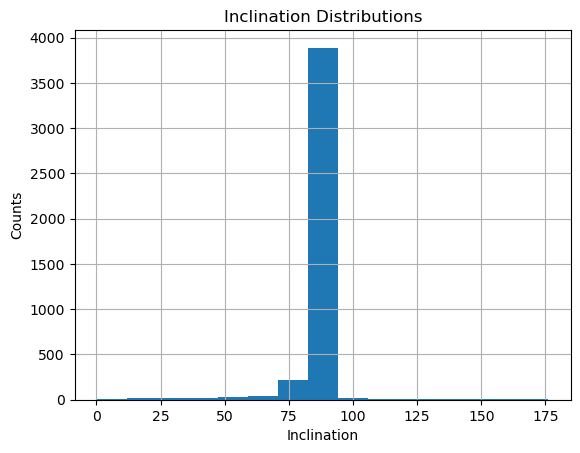

In [139]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from matplotlib import pyplot as plt
##Importing the data straight from the NASA Exoplanet, forcing the values to be floats
inclinations = pd.Series(NasaExoplanetArchive.query_criteria(table='pscomppars', select = 'pl_orbincl')['pl_orbincl'], dtype=float)

##Drop any nans
inclinations = inclinations.dropna()

##Lets get some descriptive statistics
print(inclinations.describe())

##And let's plot the results. Pandas uses pyplot for the integrated plotting of series and dataframes
inclinations.hist(bins = 15)
plt.xlabel('Inclination')
plt.ylabel('Counts')
plt.title('Inclination Distributions')


What about the population of known exoplanets might cause this distribution of inclinations? This is an excellent example of **sampling bias**. We will explore more exoplanet statistics in other examples, as well as informative [exercises]().

## DataFrames

`Series` are simple containers with useful methods for 1D data, but are in many ways are redundant with `Numpy` arrays. `DataFrames` are the flagship data structure for `pandas`, and have by far the most useful methods for tabular data. In many ways, `DataFrames` mirror Excel spreadsheets, and can be visualized with columns (with headers) and rows (with indices). `pandas` gives seamless methods to parse, select, analyze, and manipulate tabular data, which is invaluable when working with data in e.g. `.csv` files. We will outline basic properites of `DataFrames`, as well as the most important methods in order to navigate any tabular data you might encounter while researching.

### Basic Properites
Forming `DataFrames` can be done in a variety of different ways, as demonstrated below:

In [163]:
#Form it in-line, using 'column': [data]
data_line = pd.DataFrame({'Planet Name': ['EC1 b', 'EC1 c', 'EC2 b', 'EC2 c', 'EC2 c'], 'Radius': [1, 1.2, 0.5, 4, 2]})
print(data_line, '\n')

#From individual lists
names = ['EC1 b', 'EC1 c', 'EC2 b', 'EC2 c', 'EC2 c']
radius = [1, 1.2, 0.5, 4, 2]
data_list = pd.DataFrame({'Planet Name': names, 'Radius': radius})

#From a dictionary and a Series
d = {'Planet Name': ['EC1 b', 'EC1 c', 'EC2 b', 'EC2 c', 'EC2 c'], 'Radius': pd.Series([1, 1.2, 0.5, 4, 2], index=[0, 1, 2, 3, 4])}
data_dict = pd.DataFrame(data=d, index=[0, 1, 2, 3, 4])

#See if the three methods yield the same DataFrame
if data_line.equals(data_list) == True and data_line.equals(data_dict) == True and data_list.equals(data_dict) == True:
    print('All DataFrames are equal', '\n')

#From an Numpy array
data_array = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
print(data_array)

  Planet Name  Radius
0       EC1 b     1.0
1       EC1 c     1.2
2       EC2 b     0.5
3       EC2 c     4.0
4       EC2 c     2.0 

All DataFrames are equal 

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


`DataFrames` make it easy to isolate particular rows (using indices) and columns (using column names). Examples are shown below.

      pl_radj                pl_name    pl_orbper  pl_orbincl
0       1.240  OGLE-2016-BLG-1227L b          NaN         NaN
1       0.259           Kepler-276 c    31.884000      86.920
2       0.188           Kepler-829 b     6.883376      89.820
3       0.314               K2-283 b     1.921036         NaN
4       0.185           Kepler-477 b    11.119907      87.750
...       ...                    ...          ...         ...
5627    1.200  OGLE-2019-BLG-1180L b          NaN         NaN
5628    1.300             TOI-1107 b     4.078239      88.630
5629    1.230   KMT-2023-BLG-1642L b          NaN         NaN
5630    1.160             HD 73267 b  1257.991590     130.843
5631    1.160  OGLE-2017-BLG-1237L b          NaN         NaN

[5632 rows x 4 columns]
                    pl_name    pl_orbper
0     OGLE-2016-BLG-1227L b          NaN
1              Kepler-276 c    31.884000
2              Kepler-829 b     6.883376
3                  K2-283 b     1.921036
4              Kepler-477 

KeyError: 1

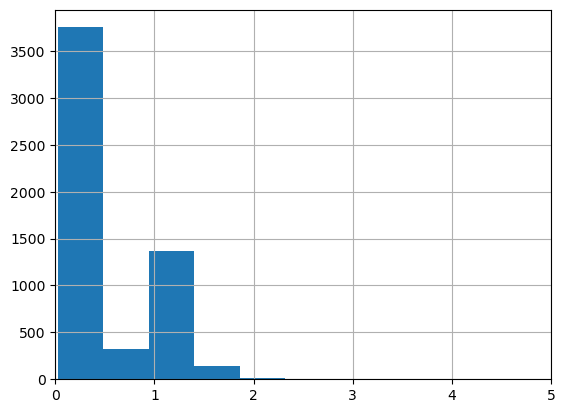

In [190]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from matplotlib import pyplot as plt

##Importing the data straight from the NASA Exoplanet Archive
##Note: Astoquery has its own method to take a query table and convert to a DataFrame!
exo_data = NasaExoplanetArchive.query_criteria(table='pscomppars', select = {'pl_name', 'pl_orbincl', 'pl_radj', 'pl_orbper'}).to_pandas()
print(exo_data)
#Let's only look at the distribution of exoplanet radii

radii = exo_data['pl_radj']
plt.xlim(0, 5)
radii.hist(bins = 15)

#What about only the planet name and orbital period?
name_period = exo_data[['pl_name', 'pl_orbper']]
print(name_period)



This gives us good flexibility on isolating specific columns of data, which is extremely useful when the datasets you are working with are high dimensional. What about rows? Can we filter results of the returned rows to match specific criteria? We can do these through the `.loc` and `.iloc` methods, which we will discuss in the next section.

## Navigating DataFrames Using .loc and .iloc

Being able to filter and isolate particular elements in a `DataFrame` is an invaluable tool, particularly when handling datasets with many thousands of entries. In `pandas`, this is primarily 